From the original full BindingDB database, we extracted a smaller, more manageable dataset by selecting only ligand-target pairs studied on viral organisms associated with sexually transmitted diseases, such as Human Immunodeficiency Virus (HIV). This subset is saved in the same `.tsv` file format as the original database.

For more details on the extraction process, refer to [`./src/data/std_extraction.ipynb`](./src/data/std_extraction.ipynb).


In [1]:
#import libraries and scripts

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from src.utils import data_utils, evaluation_utils
from src.data.some_dataloader import get_dataset
from src.scripts import rdkit_extraction
from src.utils import evaluation_utils

#imports to get rid of Morgan Fingerprint warnings
import warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

#set seaborn palette
sns.set_palette('colorblind')

We observe that HIV 1 is clearly the most represented in the dataset (this type accounts for more than 95% of HIV infections worldwide (see https://doi.org/10.1093/infdis/jiad327)).  

For this preliminar analysis, we will focus on the HIV 1 subset of STD.  
Let's create a new `hiv` dataframe, containing only rows where the target is `Human immunodeficiency virus 1`

In [2]:
hiv = pd.read_csv('HIVdb.csv')

/var/folders/9d/21rthcqs6s90c86dd2c2g41w0000gn/T/ipykernel_1233/3175418931.py:1: DtypeWarning: Columns (8,10,11,15,20,21,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  hiv = pd.read_csv('HIVdb.csv')


In [3]:
hiv = data_utils.select_metric(hiv, 'IC50 (nM)')
hiv = data_utils.clean_na_columns(hiv)

### Targets and drug classes analysis
In the previous section we analyzed macro-factors, such as the distribution of publications on HIV-1 across the years. We will now shift our focus on better understanding which types of drugs have been studied in the fight against HIV-1, and their targets.  
To begin, let's have a look at the most targeted proteins:

/Users/family/Desktop/ADA2024/project/P3/src/utils/evaluation_utils.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target Name'] = df['Target Name'].str.replace("Dimer of ", "", regex=False)
/Users/family/Desktop/ADA2024/project/P3/src/utils/evaluation_utils.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target Name'] = df['Target Name'].str.replace("Reverse transcriptase protein", "Reverse transcriptase", regex=False)


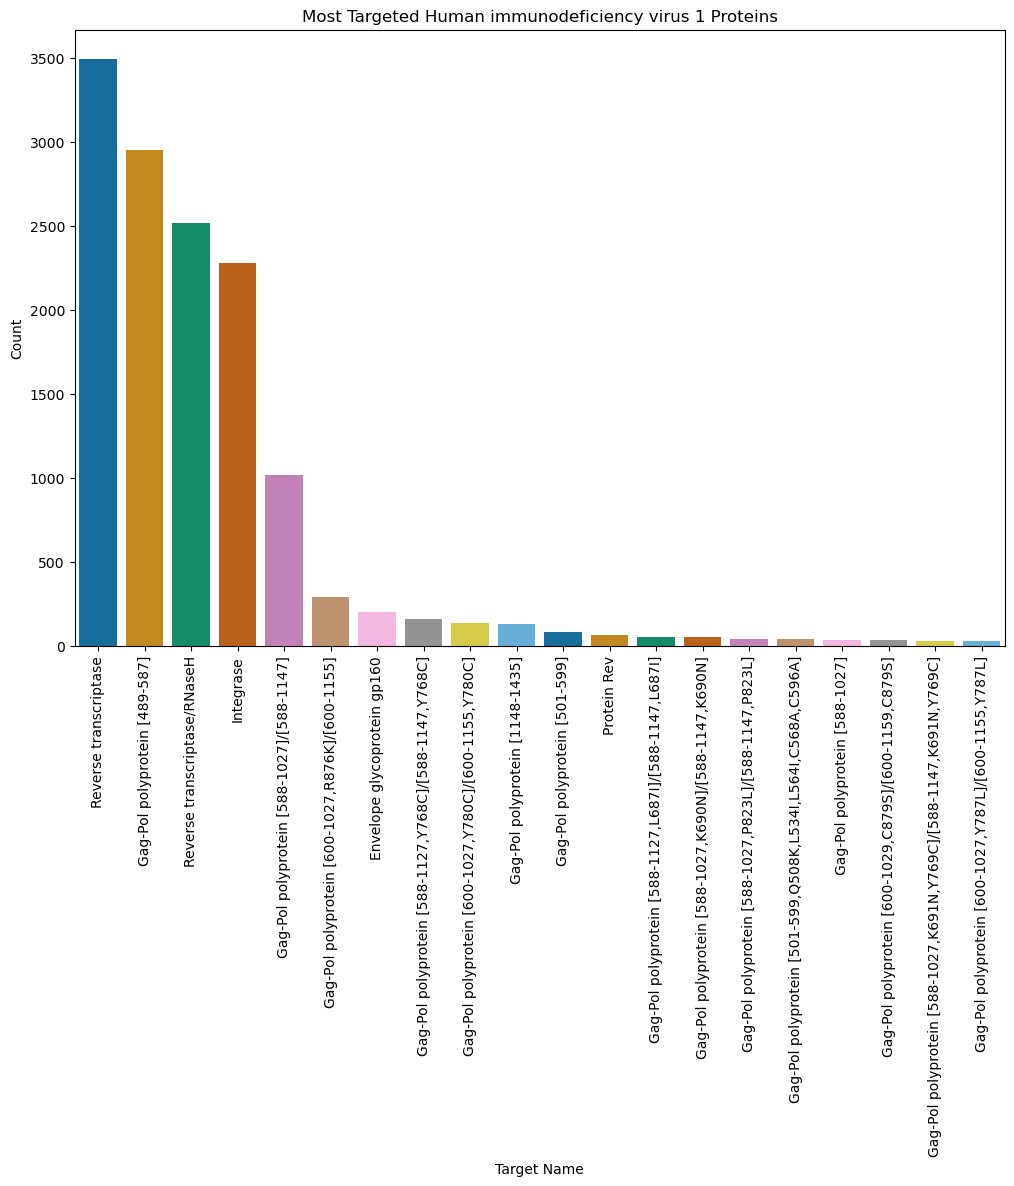

In [4]:
evaluation_utils.plot_most_targeted_proteins(hiv)

### Targeted HIV-1 Proteins

We clearly see that the most targeted proteins in HIV-1 are:

- **Reverse transcriptase**
- **Gag-Pol polyprotein**
- **Integrase**

#### Reverse Transcriptase
Reverse transcriptase is an enzyme that plays a critical role in the HIV lifecycle by converting the virus's single-stranded RNA genome into double-stranded DNA once the virus enters a host cell. This conversion allows the viral DNA to integrate into the host’s genome, a necessary step for HIV replication.

Due to its essential function, reverse transcriptase is a major target for antiretroviral drugs. Two primary classes of inhibitors target this enzyme:
- **Nucleoside Reverse Transcriptase Inhibitors (NRTIs)**: These drugs mimic DNA building blocks, causing premature termination of the DNA chain and stopping HIV replication.
- **Non-Nucleoside Reverse Transcriptase Inhibitors (NNRTIs)**: These drugs bind directly to reverse transcriptase, blocking its activity by altering the enzyme's shape.

#### Gag-Pol Polyprotein
The Gag-Pol polyprotein is a precursor protein produced from the HIV genome that contains multiple essential viral components, including reverse transcriptase, protease, and integrase. During viral maturation, the Gag-Pol polyprotein is cleaved into its functional proteins by the **protease** enzyme, allowing the formation of mature, infectious viral particles.

**Protease inhibitors** are a class of antiretroviral drugs that specifically target the protease enzyme within the Gag-Pol polyprotein. By inhibiting protease, these drugs prevent the cleavage of Gag-Pol, halting the maturation of new viral particles and rendering them non-infectious.

#### Integrase
Integrase is another enzyme within the Gag-Pol polyprotein that facilitates the integration of HIV's DNA into the host cell's genome. This integration is a crucial step in establishing a permanent infection. **Integrase inhibitors** target this enzyme, blocking the integration process and thus preventing HIV from establishing a foothold within host cells.



### 1. Affinity Comparison across Targets

In [5]:
# DF CON SOLO TARGET E IC50

hivSimple = hiv.copy()
hivSimple['Target Name'] = hivSimple['Target Name'].str.replace("Dimer of ", "", regex=False)
hivSimple['Target Name'] = hivSimple['Target Name'].str.replace("Reverse transcriptase protein", "Reverse transcriptase", regex=False)
targets = hivSimple[['Target Name','IC50 (nM)']]

targets.head(100)

,Target Name,IC50 (nM)
177,Gag-Pol polyprotein [489-587],8.5
178,Gag-Pol polyprotein [489-587],177.0
179,Gag-Pol polyprotein [489-587],164.0
180,Gag-Pol polyprotein [489-587],67.0
181,Gag-Pol polyprotein [489-587],27.0
...,...,...
324,Gag-Pol polyprotein [489-587],3.6
325,Gag-Pol polyprotein [489-587],8.6
326,Gag-Pol polyprotein [489-587],3.6
330,Gag-Pol polyprotein [489-587],9.1


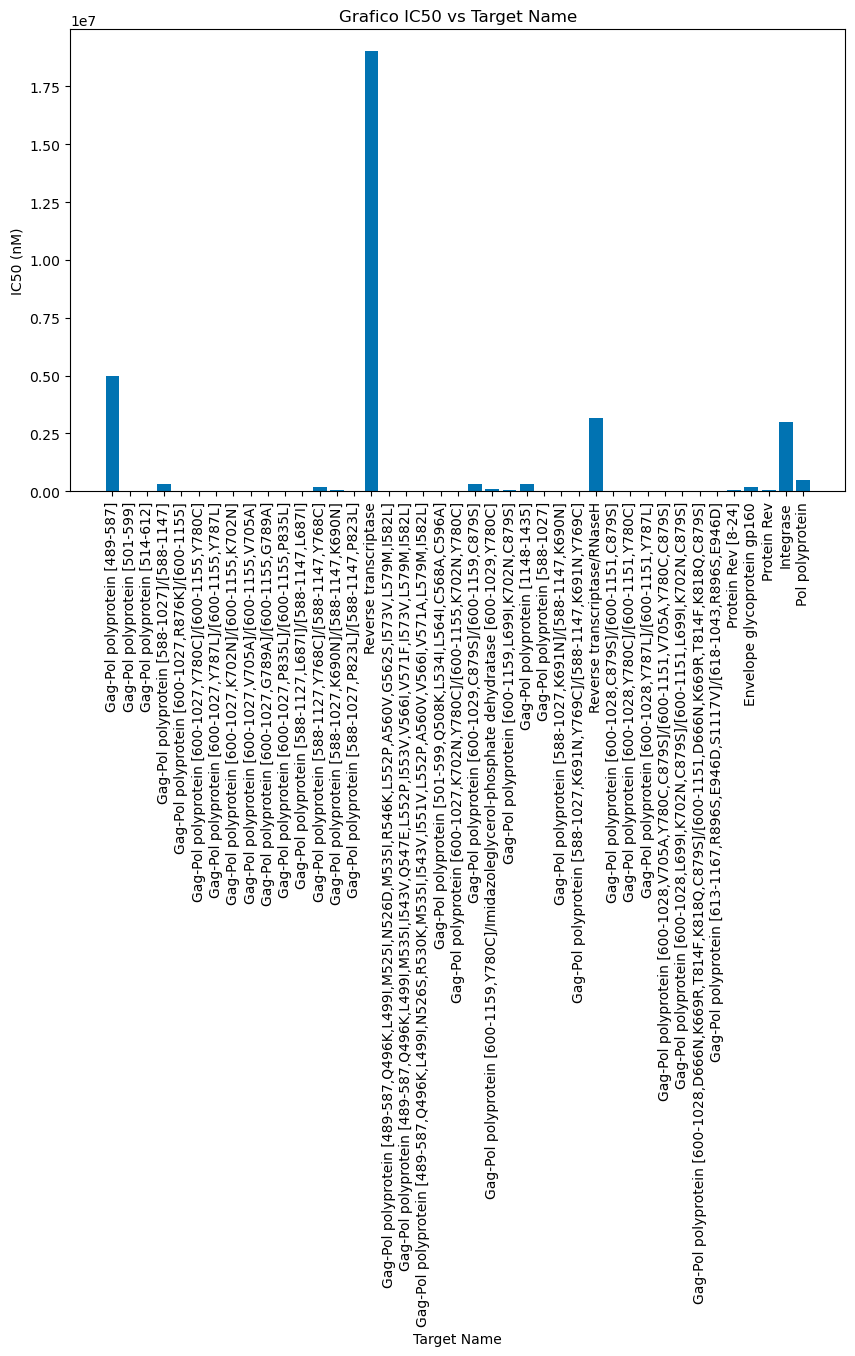

In [6]:
# PLOT TARGET VS IC50

plt.figure(figsize=(10, 6))
plt.bar(targets['Target Name'], targets['IC50 (nM)'])

plt.xlabel('Target Name')
plt.ylabel('IC50 (nM)')
plt.title('Grafico IC50 vs Target Name')

plt.xticks(rotation=90)
plt.show()

In [7]:
# DF SOLO 'Gag-Pol'

hivGagPol = hivSimple[hivSimple['Target Name'].str.contains('Gag-Pol', na=False)]
hivGagPol = hivGagPol[['Target Name','IC50 (nM)']]
hivGagPol

,Target Name,IC50 (nM)
177,Gag-Pol polyprotein [489-587],8.50
178,Gag-Pol polyprotein [489-587],177.00
179,Gag-Pol polyprotein [489-587],164.00
180,Gag-Pol polyprotein [489-587],67.00
181,Gag-Pol polyprotein [489-587],27.00
...,...,...
21820,Gag-Pol polyprotein [489-587],2000.00
21821,Gag-Pol polyprotein [489-587],0.01
21832,Gag-Pol polyprotein [489-587],4.20
21833,Gag-Pol polyprotein [489-587],12.00


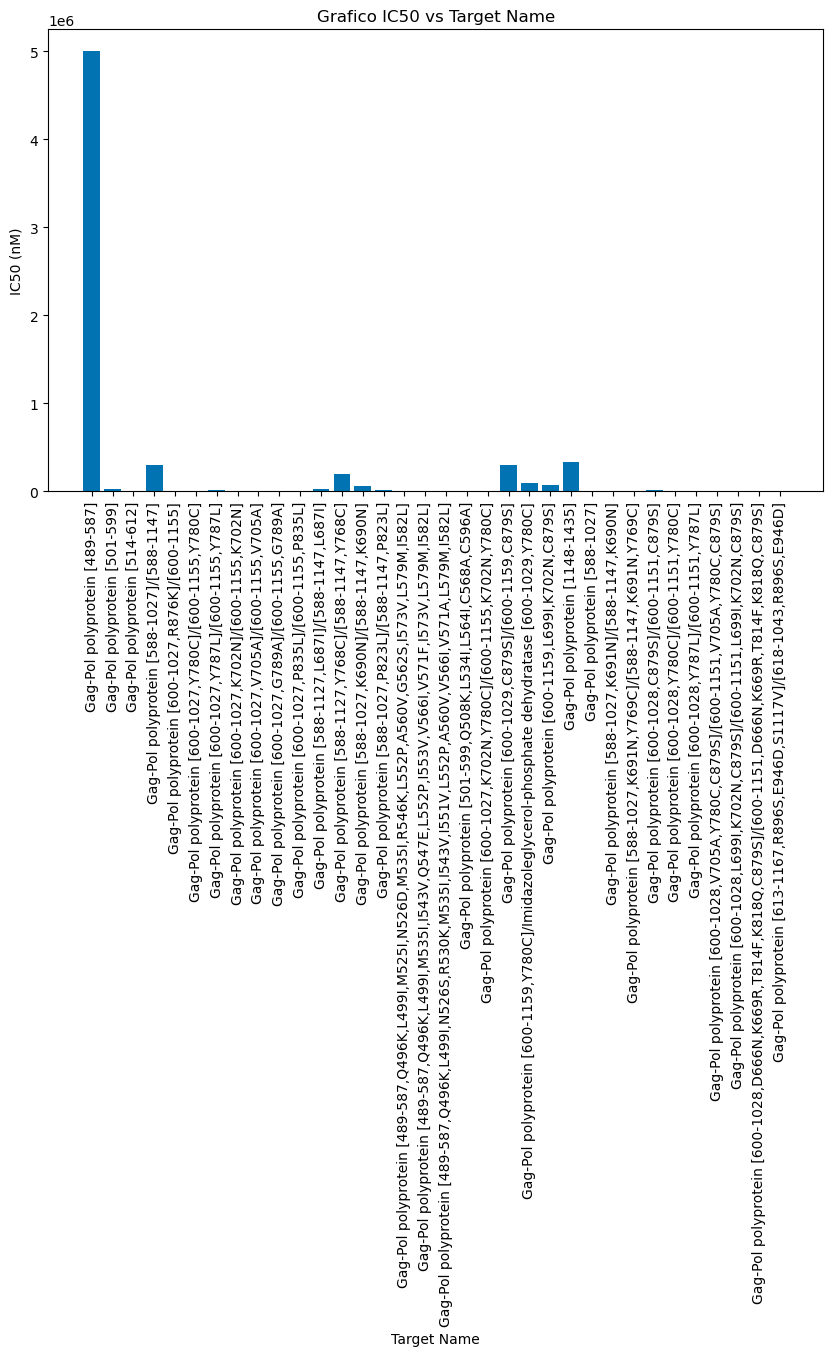

In [8]:
# PLOT SOLO GAGPOL

plt.figure(figsize=(10, 6))
plt.bar(hivGagPol['Target Name'], hivGagPol['IC50 (nM)'])

plt.xlabel('Target Name')
plt.ylabel('IC50 (nM)')
plt.title('Grafico IC50 vs Target Name')

plt.xticks(rotation=90)
plt.show()

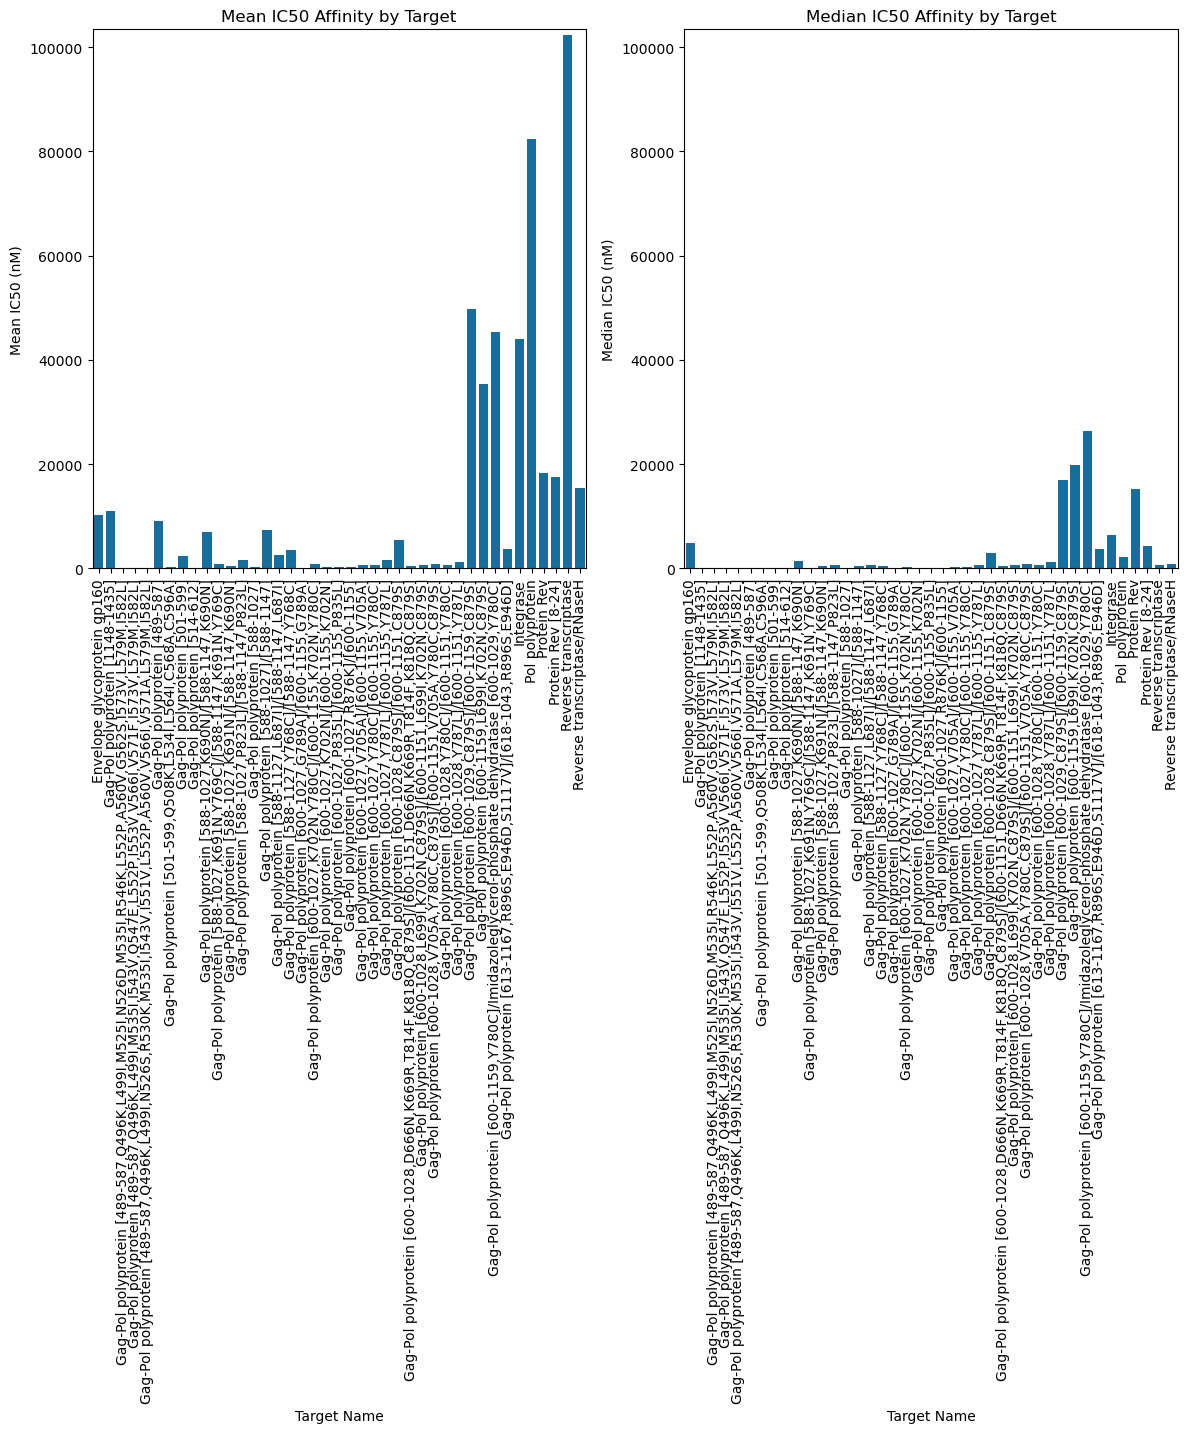

In [10]:
# PLOT AFFINTIES

# Create a plot with two subplots (mean and median IC50 values)
plt.figure(figsize=(14, 7))

# to have the same y axis
y_max = max(affinities['mean'].max(), affinities['median'].max())

# Plot Mean Affinities
plt.subplot(1, 2, 1)
sns.barplot(x=affinities.index, y=affinities['mean'])
plt.xticks(rotation=90)
plt.xlabel('Target Name')
plt.ylabel('Mean IC50 (nM)')
plt.ylim(0, y_max+1000)
plt.title('Mean IC50 Affinity by Target')

# Plot Median Affinities
plt.subplot(1, 2, 2)
sns.barplot(x=affinities.index, y=affinities['median'])
plt.xticks(rotation=90)
plt.xlabel('Target Name')
plt.ylabel('Median IC50 (nM)')
plt.ylim(0, y_max+1000)
plt.title('Median IC50 Affinity by Target')


plt.show()


#### results
Mean IC50: The mean IC50 value for each target represents the average affinity across all ligands tested. Targets with lower mean IC50 values typically show higher affinity, while higher IC50 values indicate lower affinity.

Median IC50: The median IC50 provides a robust measure of central tendency, especially when there are outliers or a skewed distribution. It's useful if the affinity distribution is not symmetrical, as it’s less sensitive to extreme values.

Comparison between Targets: By visualizing and sorting the data based on the mean and median values, you can easily identify which targets tend to have higher or lower affinities for the ligands tested.

since mean and median di 'Reverse transcriptase' are very different we plot the distribution

In [23]:
# ONLY REVERSE TRANSCRIPTASE

# Filter the DataFrame for rows where 'Target Name' contains 'Reverse transcriptase'
reverse_transcriptase_df = hivSimple[hivSimple['Target Name'].str.contains('Reverse transcriptase', na=False)]
reverse_transcriptase_df.head()

,BindingDB Reactant_set_id,Ligand SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name,Target Source Organism According to Curator or DataSource,IC50 (nM),Curation/DataSource,...,Link to Ligand-Target Pair in BindingDB,PubChem CID,PubChem SID,ZINC ID of Ligand,Number of Protein Chains in Target (>1 implies a multichain complex),BindingDB Target Chain Sequence,PDB ID(s) of Target Chain,UniProt (TrEMBL) Submitted Name of Target Chain,UniProt (TrEMBL) Entry Name of Target Chain,UniProt (TrEMBL) Primary ID of Target Chain
2929,3108.0,Clc1ccccc1-c1nc2ccccn2c1NC1CCCCC1,InChI=1S/C19H20ClN3/c20-16-11-5-4-10-15(16)18-...,TYQUWPQYYIAVMB-UHFFFAOYSA-N,2115.0,"MLB133-641A::US8501787, 8",Reverse transcriptase,Human immunodeficiency virus 1,4390.0,US Patent,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,25265801.0,242052583.0,NaN,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTELEKEGK...,NaN,Reverse transcriptase protein,Q9WJP9_9HIV1,Q9WJP9
2930,3109.0,Clc1ccccc1-c1nc2cccc(Br)n2c1NC1CCCCC1,InChI=1S/C19H19BrClN3/c20-16-11-6-12-17-23-18(...,RTYYJLSJCNMVCO-UHFFFAOYSA-N,2116.0,"DG 402-49706::US8501787, 42",Reverse transcriptase,Human immunodeficiency virus 1,4620.0,US Patent,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,45254538.0,242052584.0,NaN,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTELEKEGK...,NaN,Reverse transcriptase protein,Q9WJP9_9HIV1,Q9WJP9
3041,3356.0,Brc1ccccc1-c1nc2ccccn2c1NC1CCCCC1,InChI=1S/C19H20BrN3/c20-16-11-5-4-10-15(16)18-...,HKNQVZIXCCPODD-UHFFFAOYSA-N,2117.0,"DG 402-49651::US8501787, 43",Reverse transcriptase,Human immunodeficiency virus 1,10000.0,US Patent,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,45254539.0,242052585.0,NaN,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTELEKEGK...,NaN,Reverse transcriptase protein,Q9WJP9_9HIV1,Q9WJP9
3042,3375.0,Clc1ccccc1-c1nc2cccc(Cl)n2c1NC1CCCC1,InChI=1S/C18H17Cl2N3/c19-14-9-4-3-8-13(14)17-1...,JFXFRWXPDOGEDC-UHFFFAOYSA-N,2126.0,"DG 402-49760::US8501787, 48",Reverse transcriptase,Human immunodeficiency virus 1,5140.0,US Patent,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,45254729.0,242052586.0,NaN,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTELEKEGK...,NaN,Reverse transcriptase protein,Q9WJP9_9HIV1,Q9WJP9
3067,3444.0,Cc1ccc(Cl)c(-c2nc3ccccn3c2NC2CCCCC2)c1F,InChI=1S/C20H21ClFN3/c1-13-10-11-15(21)17(18(1...,NLCNTQDZRAPYAD-UHFFFAOYSA-N,2158.0,"DG 402-49648::US8501787, 74",Reverse transcriptase,Human immunodeficiency virus 1,90000.0,US Patent,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,58564454.0,242052587.0,NaN,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTELEKEGK...,NaN,Reverse transcriptase protein,Q9WJP9_9HIV1,Q9WJP9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,50011791.0,Fc1ccc(CCNC(=S)Nc2ccc(Br)cn2)cc1,InChI=1S/C14H13BrFN3S/c15-11-3-6-13(18-9-11)19...,SDMLMNPOMWSLBF-UHFFFAOYSA-N,50078254.0,1-(5-Bromo-pyridin-2-yl)-3-[2-(4-fluoro-phenyl...,Reverse transcriptase/RNaseH,Human immunodeficiency virus 1,6400.0,ChEMBL,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,3001773.0,103970851.0,ZINC13477225,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"1HRH,1J5O,1JKH,1JLA,1JLB,1JLC,1JLE,1JLF,1JLG,1...",Reverse transcriptase/RNaseH,Q72547_9HIV1,Q72547
6072,50011792.0,Fc1cccc(CCNC(=S)Nc2ccc(Br)cn2)c1,InChI=1S/C14H13BrFN3S/c15-11-4-5-13(18-9-11)19...,OEBGVSGGLQGGNH-UHFFFAOYSA-N,50078255.0,1-(5-Bromo-pyridin-2-yl)-3-[2-(3-fluoro-phenyl...,Reverse transcriptase/RNaseH,Human immunodeficiency virus 1,700.0,ChEMBL,...,http://www.bindingdb.org/jsp/dbsearch/PrimaryS...,3001770.0,103970852.0,ZINC00584119,1.0,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"1HRH,1J5O,1JKH,1JLA,1JLB,1JLC,1JLE,1JLF,1JLG,1...",Reverse transcriptase/RNaseH,Q72547_9HIV1,Q72547
6073,50011793.0,COc1cccc(CCNC(=S)Nc2ccc(Br)cn2)c1,InChI=1S/C15H16BrN3OS/c1-20-13-4-2-3-11(9-13)7...,YMICEBBJKAYACD-UHFFFAOYSA-N,50084098.0,1-(5-Bromo-pyridin-2-yl)-3-[2-(3-methoxy-pheny...,Reverse transcriptase/RNaseH,Human im

<Axes: xlabel='Target Name', ylabel='IC50 (nM)'>

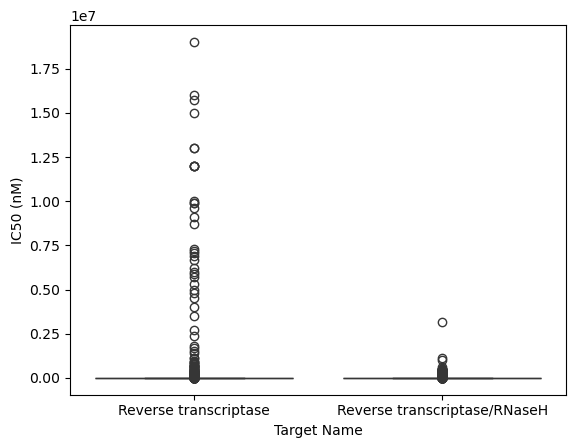

In [12]:
# PLOT OF IC50 DISTRIBUTION FOR REVERSE TRANSCRIPTASE
sns.boxplot( x='Target Name', y='IC50 (nM)', data = reverse_transcriptase_df)

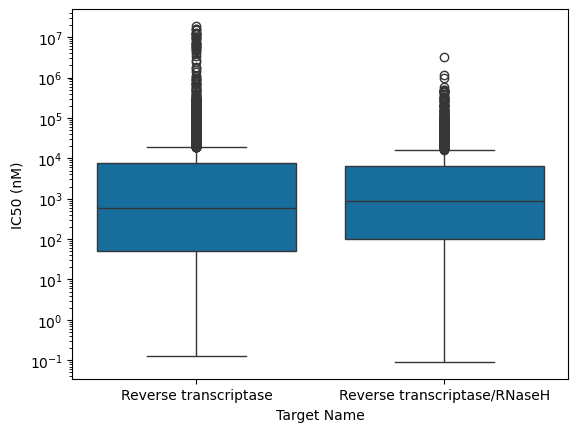

In [13]:
sns.boxplot( x='Target Name', y='IC50 (nM)', data = reverse_transcriptase_df)
plt.yscale('log')
plt.show()

we can that there are a lot of outliers

### 2. Properties (RDKIT)

/Users/family/miniconda3/envs/ada/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


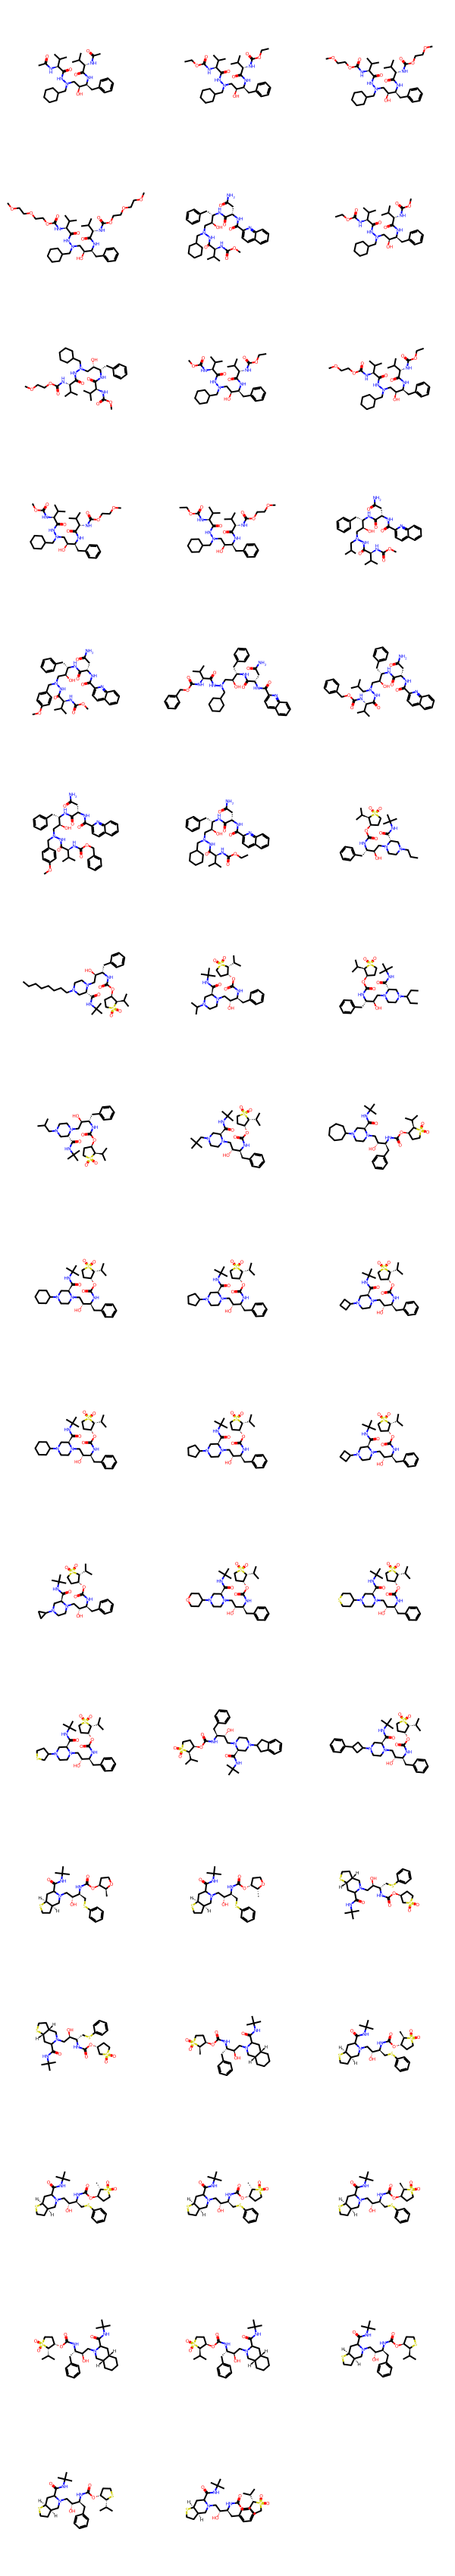

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw


hivMOL = hiv.copy()

# Convert SMILES to RDKit molecule objects
hivMOL['Molecule'] = hivMOL['Ligand SMILES'].apply(Chem.MolFromSmiles)

# Create 2D images of the ligands
img = Draw.MolsToGridImage(hivMOL['Molecule'].tolist(), molsPerRow=3, subImgSize=(200, 200))
img


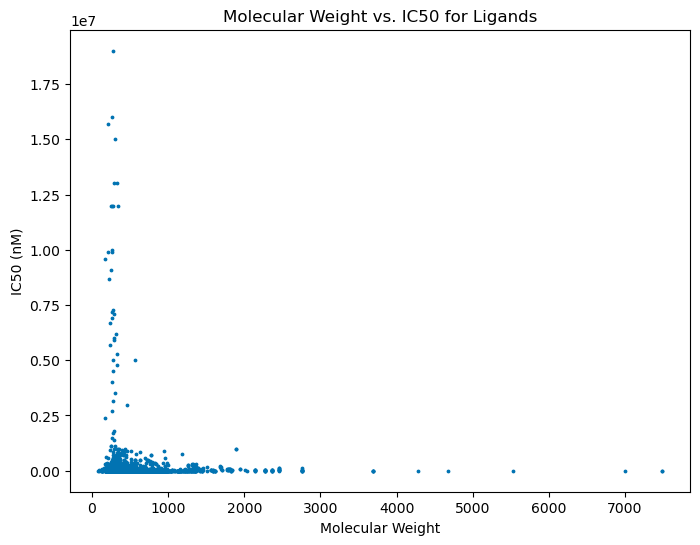

In [15]:
# MOLECULAR WEIGTH AND AFFINITY

# molecular weight (MW) for each ligand
hivMOL['Molecular Weight'] = hivMOL['Molecule'].apply(Chem.Descriptors.MolWt)



# PLOT
plt.figure(figsize=(8, 6))
plt.scatter(hivMOL['Molecular Weight'], hivMOL['IC50 (nM)'],s = 3)
plt.xlabel('Molecular Weight')
plt.ylabel('IC50 (nM)')
plt.title('Molecular Weight vs. IC50 for Ligands')
plt.show()


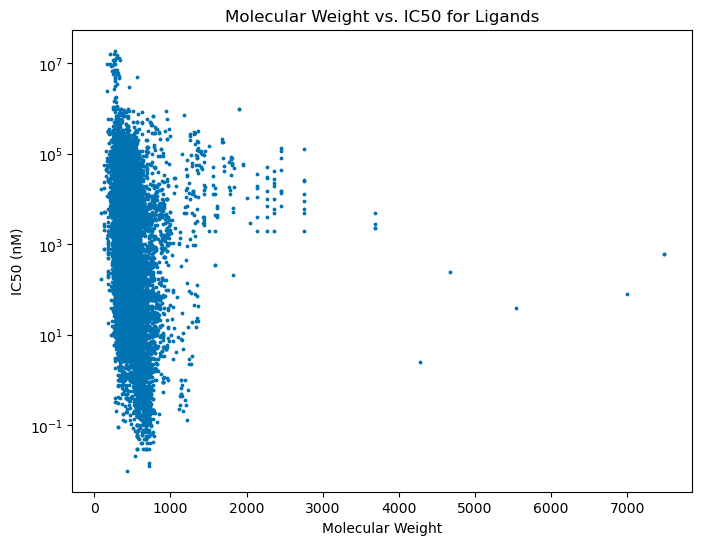

In [16]:
# Y LOG

plt.figure(figsize=(8, 6))
plt.scatter(hivMOL['Molecular Weight'], hivMOL['IC50 (nM)'],s = 3)
plt.xlabel('Molecular Weight')
plt.ylabel('IC50 (nM)')
plt.yscale('log')
plt.title('Molecular Weight vs. IC50 for Ligands')
plt.show()


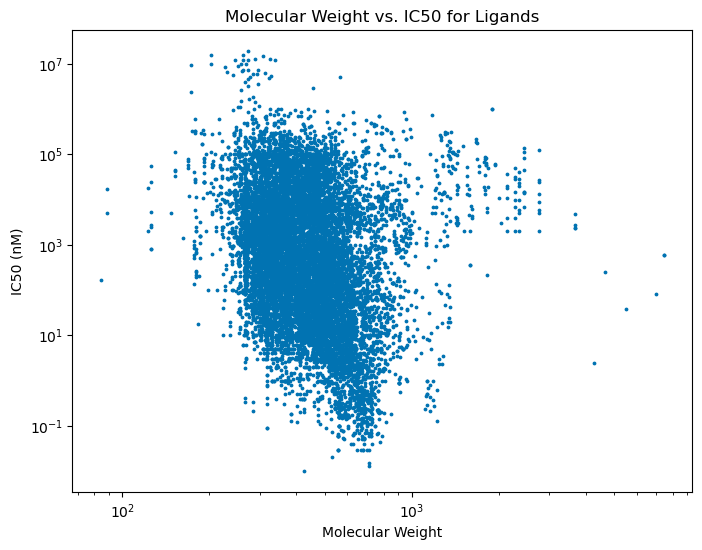

In [17]:
# BOTH LOG
plt.figure(figsize=(8, 6))
plt.scatter(hivMOL['Molecular Weight'], hivMOL['IC50 (nM)'],s = 3)
plt.xlabel('Molecular Weight')
plt.ylabel('IC50 (nM)')
plt.xscale('log')
plt.yscale('log')
plt.title('Molecular Weight vs. IC50 for Ligands')
plt.show()

In [18]:
# TEST FOR CORRELATION

#Spearman correlation
spearman_corr = hivMOL['Molecular Weight'].corr(hivMOL['IC50 (nM)'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")

Spearman Correlation: -0.3116


If ligands with larger molecular weights (e.g., due to bulky hydrophobic groups or large aromatic rings) tend to have higher IC50 values, it may suggest that size and steric effects are important for binding affinity.


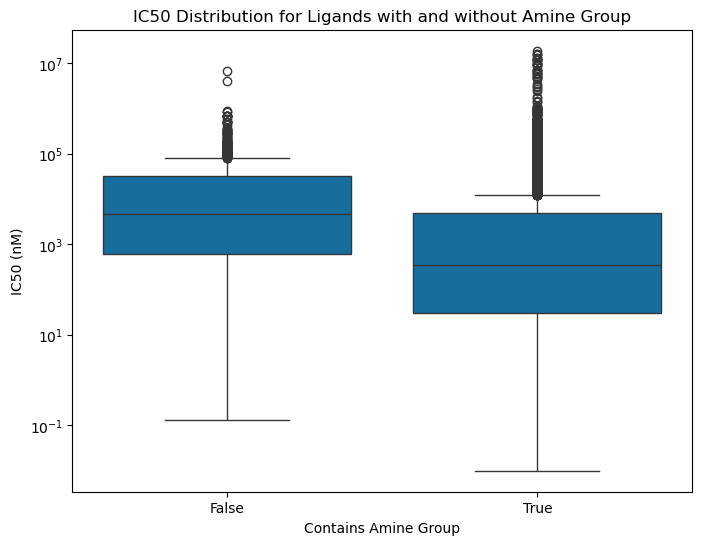

In [20]:
# FUNCTIONAL GROUP AND AFFINITY

from rdkit.Chem import rdMolDescriptors

# EX: Check if each ligand contains an amine group (-NH2)
amine_group = Chem.MolFromSmiles('N')
hivMOL['Contains Amine'] = hivMOL['Molecule'].apply(lambda x: bool(x.HasSubstructMatch(amine_group)))


# PLOT
plt.figure(figsize=(8, 6))
sns.boxplot(x='Contains Amine', y='IC50 (nM)', data=hivMOL)
plt.xlabel('Contains Amine Group')
plt.ylabel('IC50 (nM)')
plt.yscale('log')
plt.title('IC50 Distribution for Ligands with and without Amine Group')
plt.show()

# TO SEE IF HAVING THIS GROUP INFLUENCES IC50

If the presence of functional groups like amines correlates with lower IC50 values (stronger binding), this indicates that these groups may be important for strong interactions with the target.

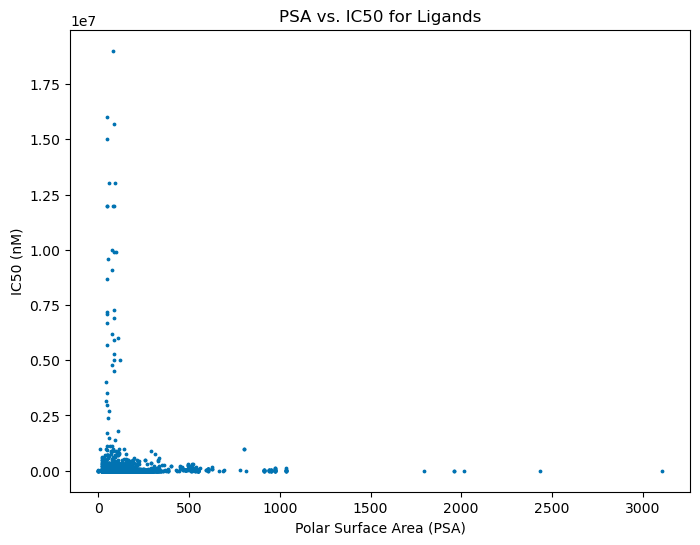

In [21]:
# POLAR SURFACE AREA AND AFFINTY
hivMOL['PSA'] = hivMOL['Molecule'].apply(Chem.rdMolDescriptors.CalcTPSA)

plt.figure(figsize=(8, 6))
plt.scatter(hivMOL['PSA'], hivMOL['IC50 (nM)'], s=3)
plt.xlabel('Polar Surface Area (PSA)')
plt.ylabel('IC50 (nM)')
plt.title('PSA vs. IC50 for Ligands')
plt.show()


In [22]:
# TEST FOR CORRELATION

#Spearman correlation
spearman_corr = hivMOL['PSA'].corr(hivMOL['IC50 (nM)'], method='spearman')
print(f"Spearman Correlation: {spearman_corr:.4f}")

Spearman Correlation: -0.1058


FOR EACH MOL FEATURE DO A FOR LOOP TO UNDERSTAND WHICH OF THEM BETTER AFFECT AFFINITY

/var/folders/9d/21rthcqs6s90c86dd2c2g41w0000gn/T/ipykernel_1233/667556099.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reverse_transcriptase_df['Contains Amine'] = hivMOL['Molecule'].apply(lambda x: bool(x.HasSubstructMatch(amine_group)))


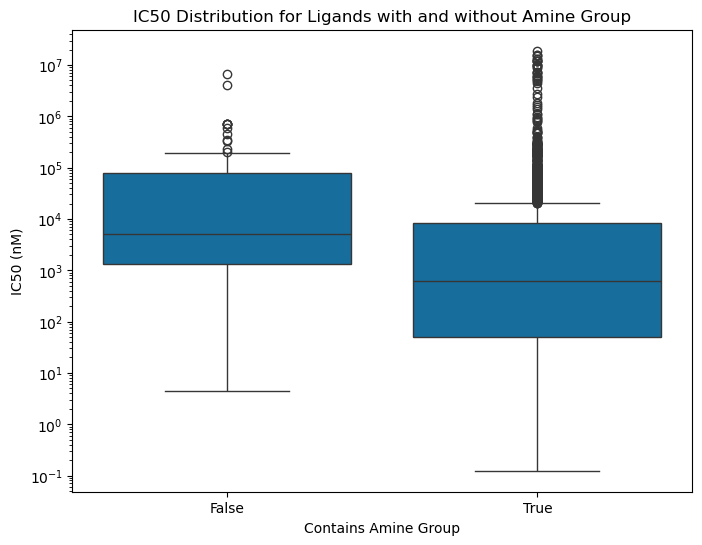

In [30]:
reverse_transcriptase_df = hivMOL[hivMOL['Target Name'] == 'Reverse transcriptase']
hivMOL['Molecule'] = hivMOL['Ligand SMILES'].apply(Chem.MolFromSmiles)


amine_group = Chem.MolFromSmiles('N')
reverse_transcriptase_df['Contains Amine'] = hivMOL['Molecule'].apply(lambda x: bool(x.HasSubstructMatch(amine_group)))


plt.figure(figsize=(8, 6))
sns.boxplot(x='Contains Amine', y='IC50 (nM)', data=reverse_transcriptase_df)
plt.xlabel('Contains Amine Group')
plt.ylabel('IC50 (nM)')
plt.yscale('log')
plt.title('IC50 Distribution for Ligands with and without Amine Group')
plt.show()

In [28]:
from scipy.stats import ttest_ind

# Esegui il test t di Student
data_true = reverse_transcriptase_df[reverse_transcriptase_df['Contains Amine'] == True]['IC50 (nM)'].values
data_false = reverse_transcriptase_df[reverse_transcriptase_df['Contains Amine'] == False]['IC50 (nM)'].values
t_stat, p_value = ttest_ind(data_true, data_false, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_value)

t-statistic: -0.8105673266834345 p-value: 0.4191508170946556


SCUSA SIMO, CODICE FA SCHIFO <3